# **Trabajo de Fin de Grado**
## **Predicción del Precio del Oro mediante Modelos de Aprendizaje Automático**

**Autor:** Sebastián Malbaceda Leyva
**Tutor:** Alberto Rubio
**Grado en Ingeniería Informática – Universitat Autònoma de Barcelona**
**Campus Bellaterra, Septiembre 2025**

---

## **Descripción General del Proyecto**

El presente **Trabajo de Fin de Grado (TFG)** tiene como propósito el diseño e implementación de un **sistema predictivo del precio del oro a corto plazo**, empleando técnicas de **Machine Learning (ML)** y **análisis de series temporales**.

El proyecto se enmarca en la línea de *modelización financiera* y análisis cuantitativo de activos, buscando **comparar la eficacia de distintos modelos predictivos** —lineales, basados en árboles y estadísticos clásicos— para determinar su viabilidad, precisión y robustez en el contexto del mercado del oro.

Históricamente, el oro ha sido considerado un **activo refugio**, especialmente en períodos de inestabilidad económica o política. Sin embargo, su valor está condicionado por una gran cantidad de factores interrelacionados, como la **política monetaria**, las **expectativas de inflación**, la **fortaleza del dólar estadounidense**, el **comportamiento de los mercados bursátiles** y los **indicadores de riesgo global**.

Predecir su precio representa, por tanto, un reto de gran complejidad analítica:
- Es un activo **altamente volátil**, afectado por variables de distinta naturaleza y frecuencia temporal.
- Combina **movimientos especulativos de corto plazo** con **factores macroeconómicos estructurales**.
- Requiere integrar datos **heterogéneos y multiescalares** (diarios, mensuales, anuales).

Este TFG busca abordar esa complejidad construyendo un pipeline reproducible de *Machine Learning* que permita **capturar relaciones causales y patrones dinámicos**, generando una herramienta predictiva aplicable a la toma de decisiones en el ámbito financiero.

---

## **Estructura del Proyecto**

El desarrollo del proyecto se organiza en siete etapas principales:

1. **Definición del problema y recopilación de datos.**
2. **Preprocesamiento y armonización temporal de las series.**
3. **Análisis exploratorio (EDA) y selección de características.**
4. **Ingeniería de características (Feature Engineering).**
5. **Entrenamiento de modelos predictivos.**
6. **Evaluación y validación temporal.**
7. **Interpretabilidad de resultados y conclusiones.**

---

# **1) Definición del Problema y Datos**

---

## **Contexto del Problema**

El objetivo principal de este trabajo es **predecir el precio spot del oro (XAU/USD)** utilizando técnicas de *Machine Learning* y *series temporales multivariadas*.
El sistema propuesto debe ser capaz de **estimar movimientos futuros del oro a corto plazo**, integrando información de los mercados financieros, variables macroeconómicas y factores de sentimiento global.

El precio del oro se ve afectado por una amplia gama de determinantes:

- **Política monetaria y tasas de interés** (FED Funds Rate, rendimientos de bonos).
- **Índice del dólar (DXY)** y otros tipos de cambio.
- **Indicadores bursátiles** (S&P 500, VIX, índices de commodities).
- **Variables macroeconómicas** (PIB, inflación, desempleo, oferta monetaria).
- **Flujos de inversión** en ETFs y posiciones en futuros (CFTC, SPDR Gold Shares).
- **Riesgo e incertidumbre geopolítica** (EPU, GPR).
- **Factores sociales y de comportamiento** (Google Trends, confianza del consumidor).

Por la naturaleza del activo, el proyecto se clasifica como un **problema de regresión de series temporales**, donde el objetivo es predecir un valor numérico continuo en función de un conjunto amplio de variables históricas y exógenas.

---

## **Datos Utilizados**

Durante la fase inicial se recolectaron **más de 60 variables válidas**, verificadas y documentadas, provenientes de fuentes oficiales y plataformas financieras reconocidas.
Estas variables representan una visión completa del entorno económico, financiero y de mercado del oro.

### Principales categorías y ejemplos de variables

| Categoría | Ejemplos de Variables | Fuente | Frecuencia |
|------------|----------------------|---------|-------------|
| **Precio del Oro (Target)** | Oro spot (XAU/USD), Oro futuros (GCZ5) | Investing.com | Diaria |
| **Metales Preciosos** | Plata (XAG/USD), Platino (XPT/USD), Paladio (XPD/USD), Cobre (PCOPPUSDM) | FRED / Investing | Diaria / Mensual |
| **Índices Financieros** | S&P 500, DXY, VIX, CRB, Bloomberg Commodity Index | FRED / Investing | Diaria |
| **Energía y Materias Primas** | WTI, Brent (spot y futuros) | FRED / Investing | Diaria |
| **Macroeconomía** | Inflación (CPI), PIB, M2, Producción Industrial, Desempleo, Ventas minoristas | FRED | Mensual / Trimestral |
| **Bonos y Tasas de Interés** | DGS2, DGS10, T10YIE, DFII10 (TIPS), Credit Spread | FRED | Diaria |
| **Riesgo Global** | EPU, GPR, Financial Stress Index | policyuncertainty.com / Matteo Iacoviello / FRED | Diaria / Semanal |
| **Sentimiento del Consumidor** | UMCSENT, CCI, Google Trends “Gold” | FRED / OECD / Google Trends | Mensual |
| **Flujos e Inversión** | ETF holdings (GLD), posiciones CFTC, balance de la FED | SPDR / CFTC / FRED | Diaria / Semanal |
| **Divisas y Criptoactivos** | USD/CNY, EUR/USD, USD/JPY, Bitcoin | Investing / FRED | Diaria |

El conjunto final se organiza en tres niveles de frecuencia:
- **≈40 variables diarias**
- **≈13 variables mensuales**
- **1 variable anual (déficit fiscal)**

---

## **Preprocesamiento de los Datos**

Dada la naturaleza heterogénea de las fuentes, fue necesario aplicar un proceso de **armonización temporal, imputación y normalización** antes del análisis exploratorio y modelado.

### Pasos principales

1. **Conversión de frecuencias:**
   Todas las series se alinearon en una misma escala temporal (diaria), manteniendo la coherencia temporal mediante:
   - *Forward-fill* para series diarias.
   - *Interpolación lineal* o spline para series mensuales, trimestrales y anuales.

2. **Tratamiento de valores faltantes:**
   Aplicación de métodos de imputación dependientes de la naturaleza de cada serie, y creación de indicadores binarios en casos relevantes (*missingness informative*).

3. **Normalización y escalado:**
   Uso de `StandardScaler` o `RobustScaler` para asegurar comparabilidad entre magnitudes.

4. **Control de colinealidad:**
   Evaluación mediante correlaciones de Pearson/Spearman y **Variance Inflation Factor (VIF)**, eliminando redundancias o combinando variables.

5. **Homogeneización de unidades y formatos:**
   Conversión de todas las magnitudes a dólares estadounidenses (USD) y ajuste de porcentajes, rendimientos y tasas.

6. **Consolidación final:**
   Obtención de un **dataset multivariado limpio, sincronizado y sin valores nulos**, preparado para el EDA y el modelado.

---

## **Objetivo del Modelo**

El objetivo del modelo es **predecir el precio spot del oro a corto plazo** (1–5 días), integrando variables históricas del propio oro y determinantes externos.
El enfoque busca capturar tanto relaciones lineales como no lineales y medir la influencia relativa de cada grupo de factores.

### Tipo de problema
- **Regresión supervisada multivariante de series temporales.**

### Variable objetivo (Target)
- `gold_spot` — precio spot del oro (USD/oz).

### Métricas de evaluación
- **RMSE (Root Mean Squared Error)**: penaliza errores grandes.
- **MAE (Mean Absolute Error)**: magnitud media del error en unidades monetarias.
- **R² (Coeficiente de determinación)**: porcentaje de varianza explicada.

### Validación
- **Cross-validation temporal (TimeSeriesSplit)** para evaluar el rendimiento a lo largo del tiempo, evitando *data leakage*.

---

## **Metodología General y Guía de Trabajo**

El pipeline metodológico adoptado sigue una estructura coherente con las mejores prácticas de la ciencia de datos moderna (según la *Guía Definitiva ML*):

1. **Obtención de datos** — consolidación de fuentes externas (FRED, Investing, WGC, CFTC, SPDR).
2. **Preprocesamiento** — imputación, limpieza y homogeneización temporal.
3. **Selección de características** — combinación de métodos univariados y multivariados:
   - Correlaciones (Pearson/Spearman).
   - Información mutua y F-test.
   - Importancia de árboles (Random Forest, XGBoost).
   - Reducción de dimensionalidad con PCA.
   - Cálculo de VIF para multicolinealidad.
4. **Feature Engineering temporal** — creación de variables derivadas:
   - Lags, medias móviles, volatilidad, retornos logarítmicos.
   - Variables estacionales (día, mes).
   - Indicadores técnicos derivados (RSI, curva 10Y−2Y).
5. **Modelado** — comparación de modelos:
   - *Lineales:* Regresión, Ridge, Lasso.
   - *Basados en árboles:* RandomForest, XGBoost, LightGBM, CatBoost.
   - *Series temporales:* ARIMA, SARIMA.
6. **Evaluación y validación temporal:**
   MSE, RMSE, MAE, análisis de tendencia y direccionalidad.
7. **Interpretabilidad:**
   SHAP values, permutation importance, análisis de sensibilidad.

---

## **Fuentes de los Datos**

| Fuente | Descripción | Enlace |
|--------|--------------|--------|
| FRED (Federal Reserve Economic Data) | Datos macroeconómicos y financieros (PIB, inflación, tasas, producción industrial, empleo). | https://fred.stlouisfed.org |
| Investing.com | Precios spot y futuros de metales, índices, commodities y divisas. | https://www.investing.com |
| World Gold Council (WGC) | Datos estructurales sobre demanda, reservas y oferta de oro. | https://www.gold.org |
| CFTC (Commitments of Traders Reports) | Posiciones netas de traders en los mercados de futuros. | https://www.cftc.gov/MarketReports |
| SPDR Gold Shares (ETF GLD) | Flujos de ETFs respaldados por oro físico. | https://www.spdrgoldshares.com |
| Economic Policy Uncertainty Index (EPU) | Nivel de incertidumbre económica global. | https://www.policyuncertainty.com |
| Geopolitical Risk Index (GPR) | Medición del riesgo geopolítico mundial. | https://www.matteoiacoviello.com/gpr.htm |
| Google Trends | Interés de búsqueda del término “Gold”. | https://trends.google.com |

---

## **Conclusión del Punto 1**

En este primer bloque se ha establecido el **contexto, los objetivos y la base de datos del proyecto**.
El oro, como activo multifactorial, requiere un tratamiento analítico riguroso y la integración de fuentes heterogéneas de información.
El conjunto de datos recolectado y preprocesado constituirá el punto de partida para el **Análisis Exploratorio de Datos (EDA)**, donde se identificarán patrones, correlaciones y variables clave antes del entrenamiento de los modelos predictivos.


# **2) Análisis Exploratorio de Datos (EDA)**

In [257]:
# =========================
# Imports básicos
# =========================
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression, f_regression, RFECV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import missingno as msno
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [258]:
# -------------------------
# CONFIG
# -------------------------
DATASET_PATH = "../data/dataset.csv"
TARGET = "gold_spot"
DATE_COL = "date"
OUTPUT_DIR = "stage1_outputs"

PCA_VARIANCE_THRESHOLD = 0.95
RF_RANDOM_STATE = 1
START_YEAR = 2000
RFE_STEP = 0.1
TS_FOLDS = TimeSeriesSplit(n_splits=5, gap=5)

os.makedirs(OUTPUT_DIR, exist_ok=True)


In [259]:
# -------------------------
# Frecuencia de features
# -------------------------
daily = [
    "gold_spot", "gold_futures", "us10y_yield", "us10y_breakeven", "us2y_yield",
    "dxy_index", "dxy_future", "sp500_index", "sp500_futures", "vix_index",
    "vix_futures", "wti_spot", "wti_futures", "brent_spot", "brent_futures",
    "silver_spot", "silver_futures", "copper_futures", "commodities_crb",
    "commodities_bloomberg", "cftc_gold_positions", "etf_gold_flows",
    "policy_uncertainty", "usdcny_exchange", "us10y_tips", "credit_spread",
    "gold_volatility_gvz", "ovx_index", "gdx_index", "comex_micro_gold",
    "geopolitical_risk", "platinum_spot", "platinum_futures", "palladium_spot",
    "palladium_futures", "bitcoin_price", "comex_inventories", "eurusd_exchange",
    "usdjpy_exchange", "usdinr_exchange", "move_index"
]

weekly = [
    "fed_balance_walcl", "us_financial_stress_index"
]
monthly = [
    "fed_funds", "copper_spot", "us_cpi", "us_m2", "us_industrial_production",
    "us_retail_sales", "us_unemployment", "us_consumer_sentiment",
    "fx_reserves_china", "consumer_confidence",
    "google_trends_gold_element", "google_trends_gold_word", "export_price_index",
    "us_personal_saving_rate", "us_pmi_manufacturing"
]
quarterly = [
    "us_gdp"
]
annual = [
    "us_fiscal_deficit", "us10y_real"
]

In [260]:
# -------------------------
# 1. Cargar dataset
# -------------------------
df = pd.read_csv(DATASET_PATH, parse_dates=[DATE_COL])
df = df.sort_values(DATE_COL).reset_index(drop=True)

cols = [DATE_COL, TARGET] + [c for c in df.columns if c not in [DATE_COL, TARGET]]
df = df[cols]

Visualizando patrón de valores nulos...


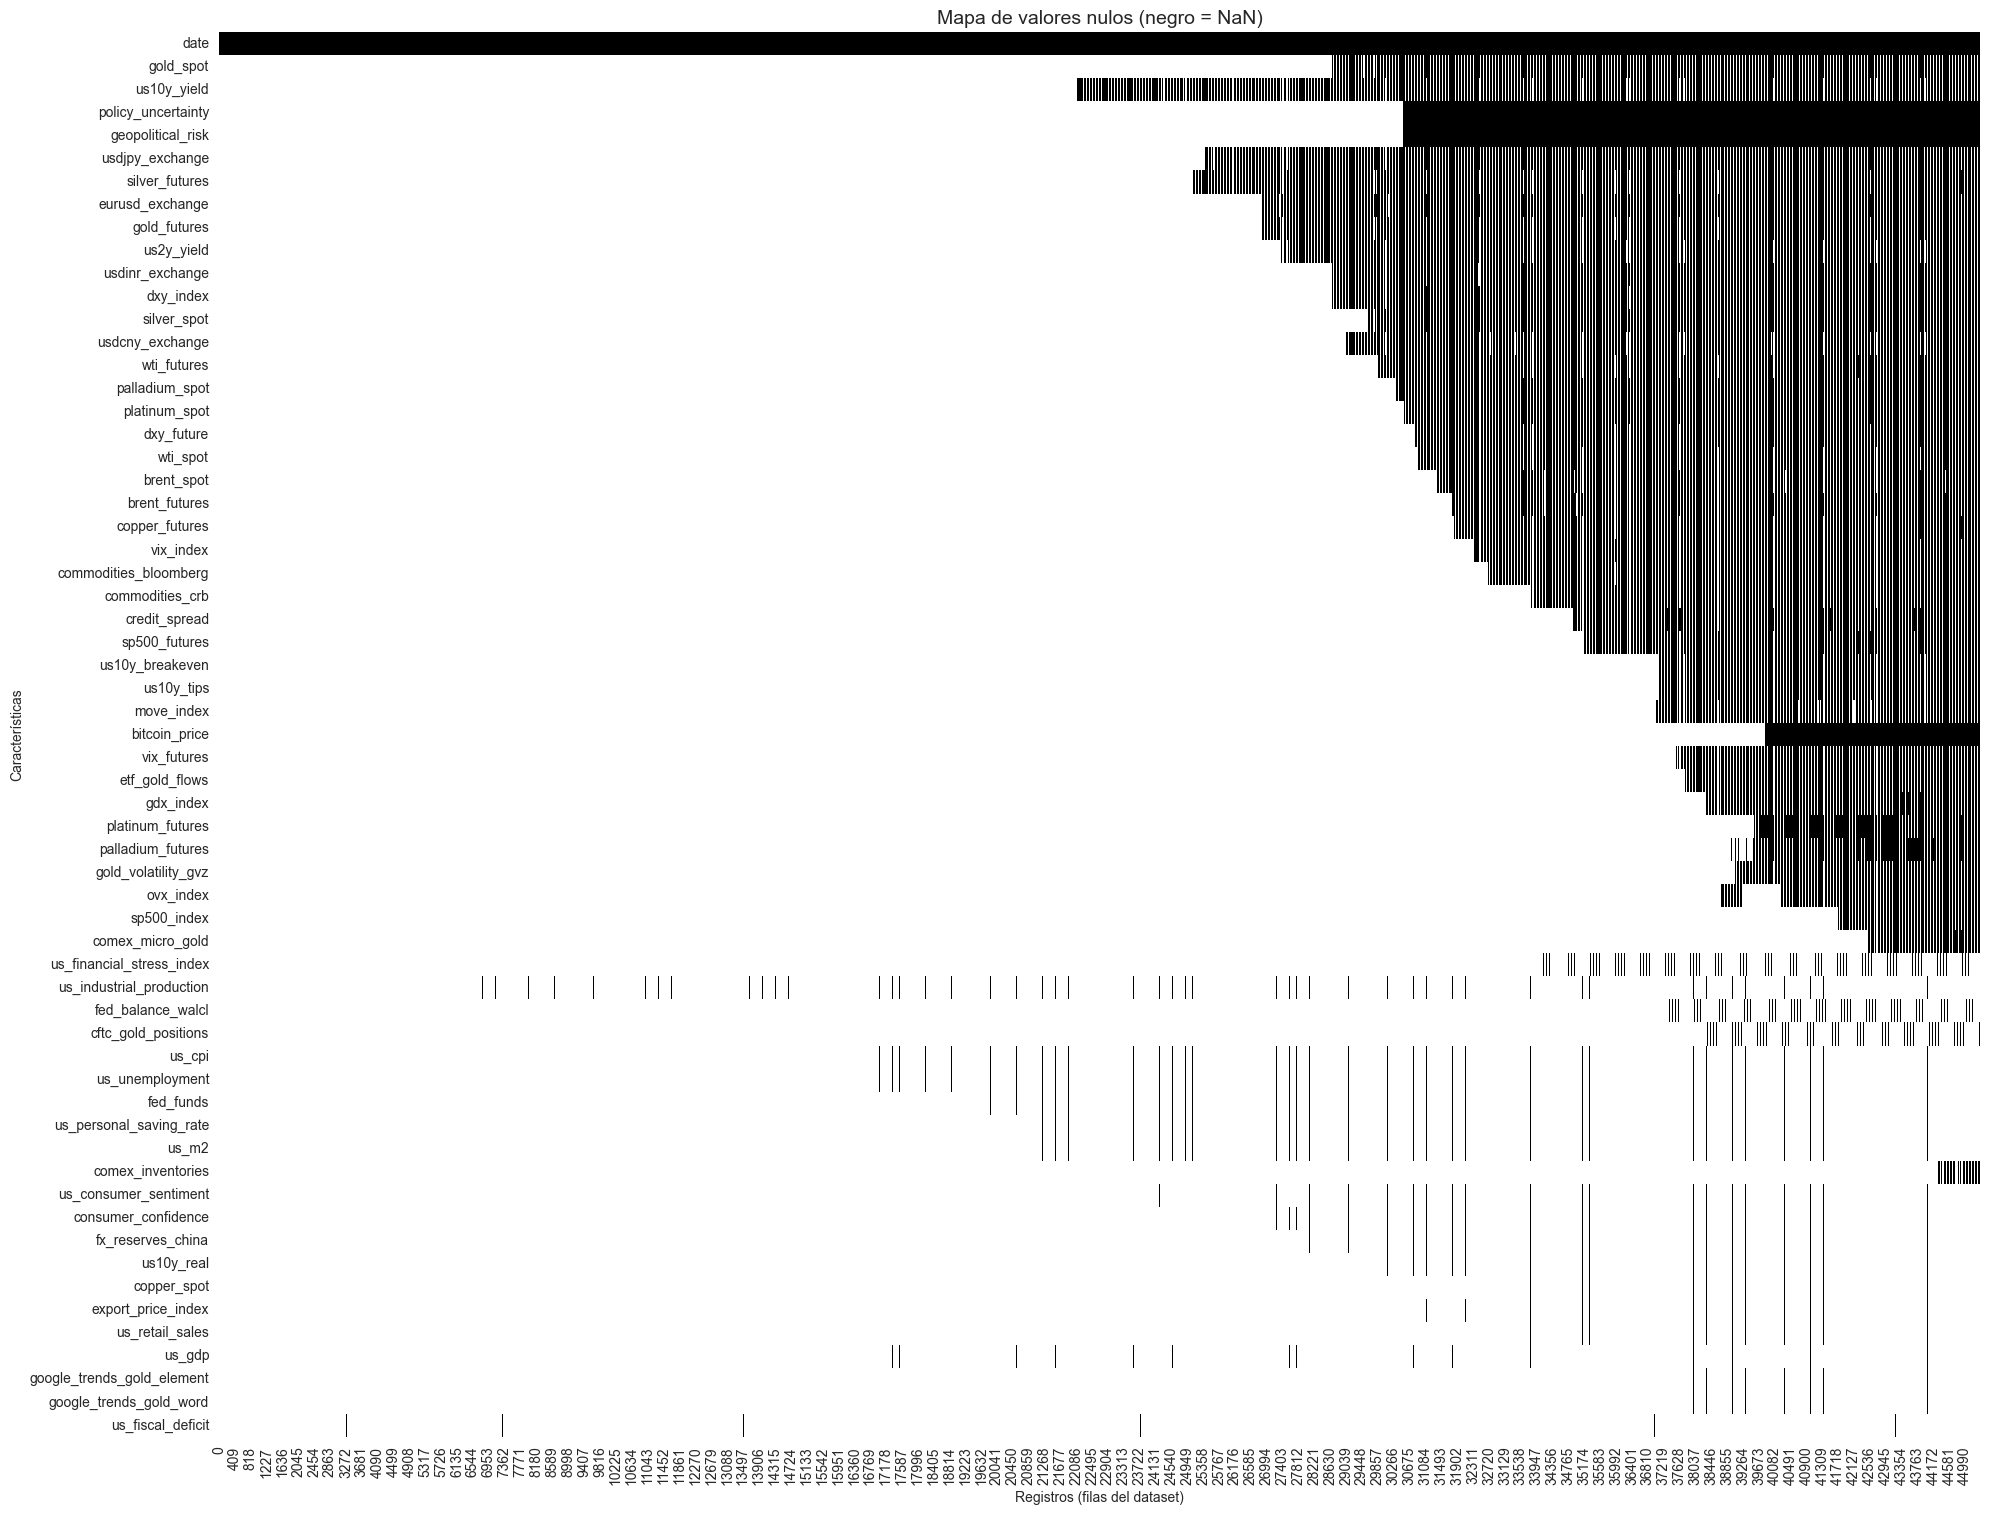

In [261]:
# -------------------------
# 2.1 Visualización directa de los valores nulos (mapa binario ancho)
# -------------------------
print("Visualizando patrón de valores nulos...")
null_mask = df.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos (negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


In [262]:
# -------------------------
# 2. Filtrar dataset desde el primer año con target disponible
# -------------------------
first_valid_year = df.loc[df[TARGET].notna(), DATE_COL].dt.year.min()
print(f"Primer año con valor válido de {TARGET}: {first_valid_year}")
START_YEAR = first_valid_year + 1
df = df[df[DATE_COL].dt.year >= START_YEAR].reset_index(drop=True)
print(f"Dataset filtrado desde {START_YEAR}: {len(df)} filas")


Primer año con valor válido de gold_spot: 1979
Dataset filtrado desde 1980: 16694 filas


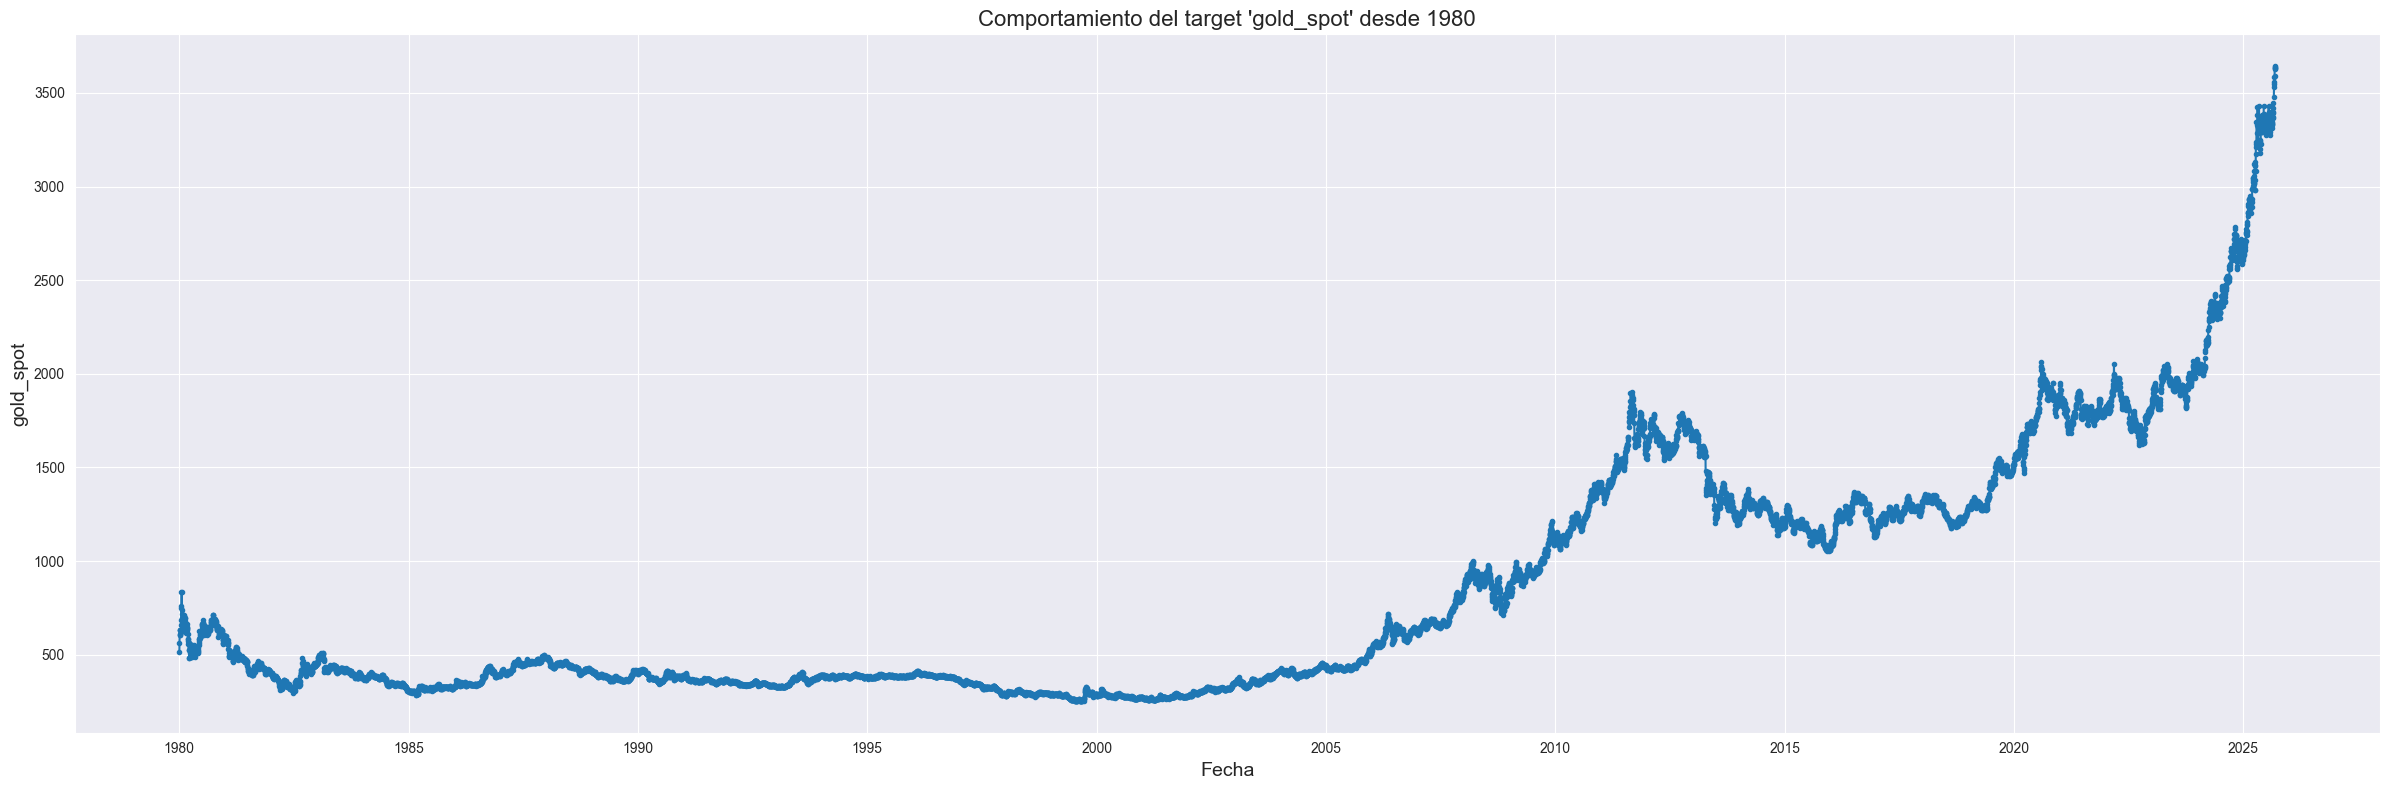

In [263]:
# -------------------------
# 2.X Visualización del target desde el primer año válido (pantalla completa)
# -------------------------
df_viz = df.copy()
plt.figure(figsize=(24, 8))
plt.plot(df_viz[DATE_COL], df_viz[TARGET], marker='o', linestyle='-', markersize=3)
plt.title(f"Comportamiento del target '{TARGET}' desde {START_YEAR}", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel(TARGET, fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [264]:
# -------------------------
# 2.X Recorte definitivo del dataset según 'geopolitical_risk'
# -------------------------
# Primer año con valor válido en 'geopolitical_risk'
START_YEAR = df.loc[df['geopolitical_risk'].notna(), DATE_COL].dt.year.min()
print(f"Punto de partida definitivo: {START_YEAR}")

# Recortar dataset desde ese año
df = df[df[DATE_COL].dt.year >= START_YEAR].reset_index(drop=True)
print(f"Dataset filtrado desde {START_YEAR}: {len(df)} filas")


Punto de partida definitivo: 1985
Dataset filtrado desde 1985: 14867 filas


Visualizando patrón de valores nulos...


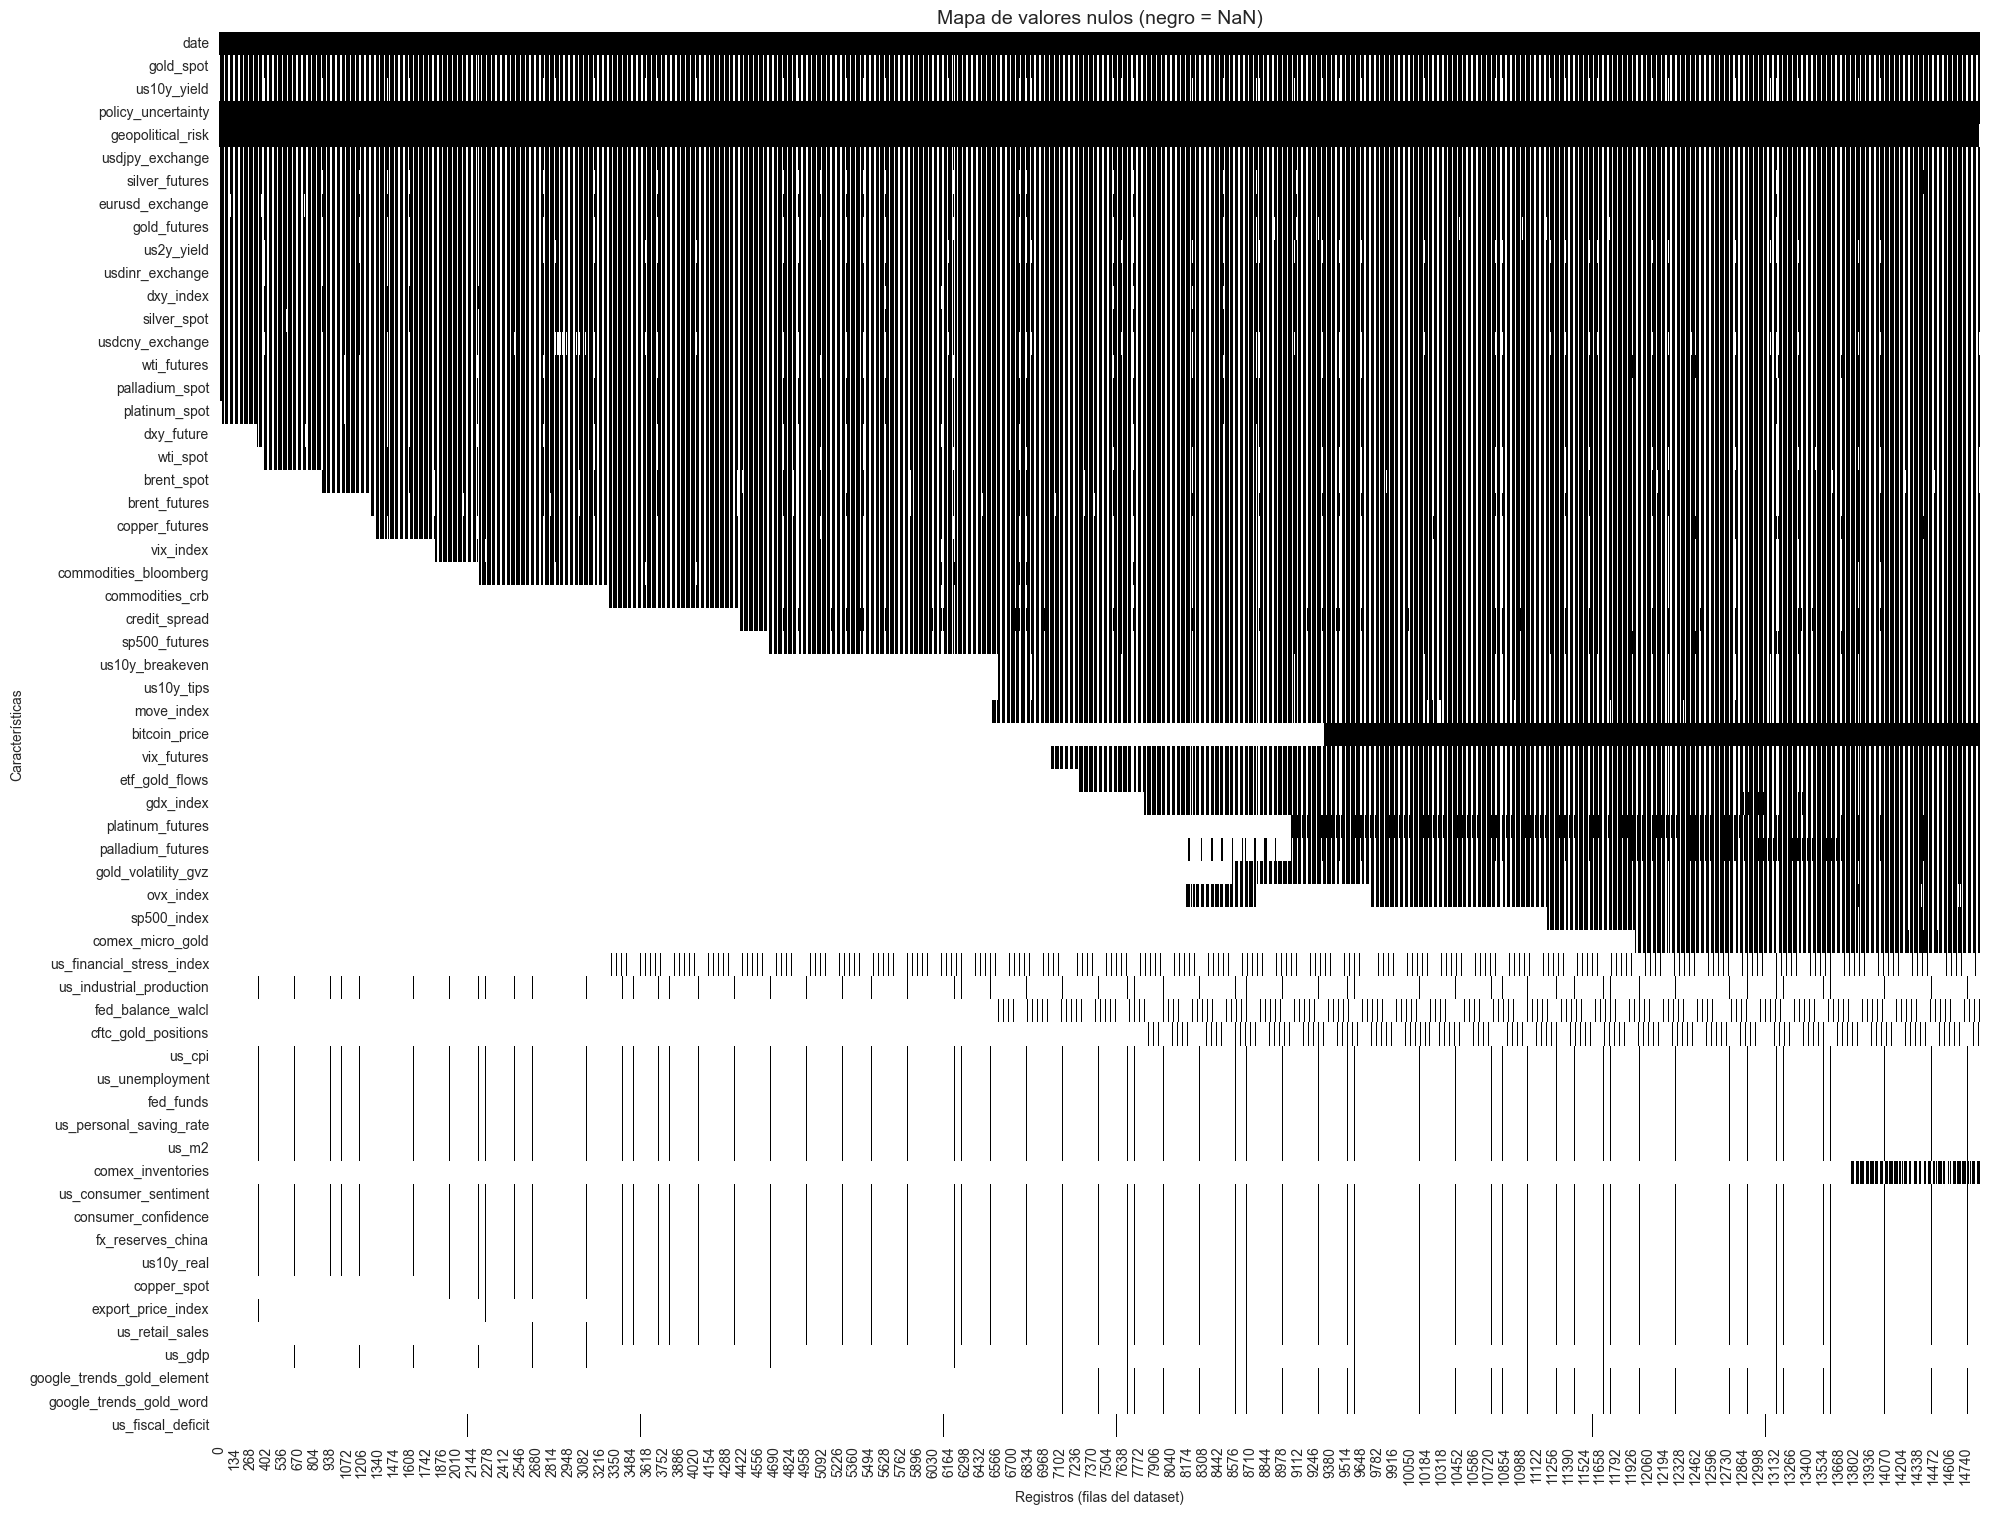

In [265]:
# -------------------------
# 2.1 Visualización directa de los valores nulos (mapa binario ancho)
# -------------------------
print("Visualizando patrón de valores nulos...")
null_mask = df.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos (negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


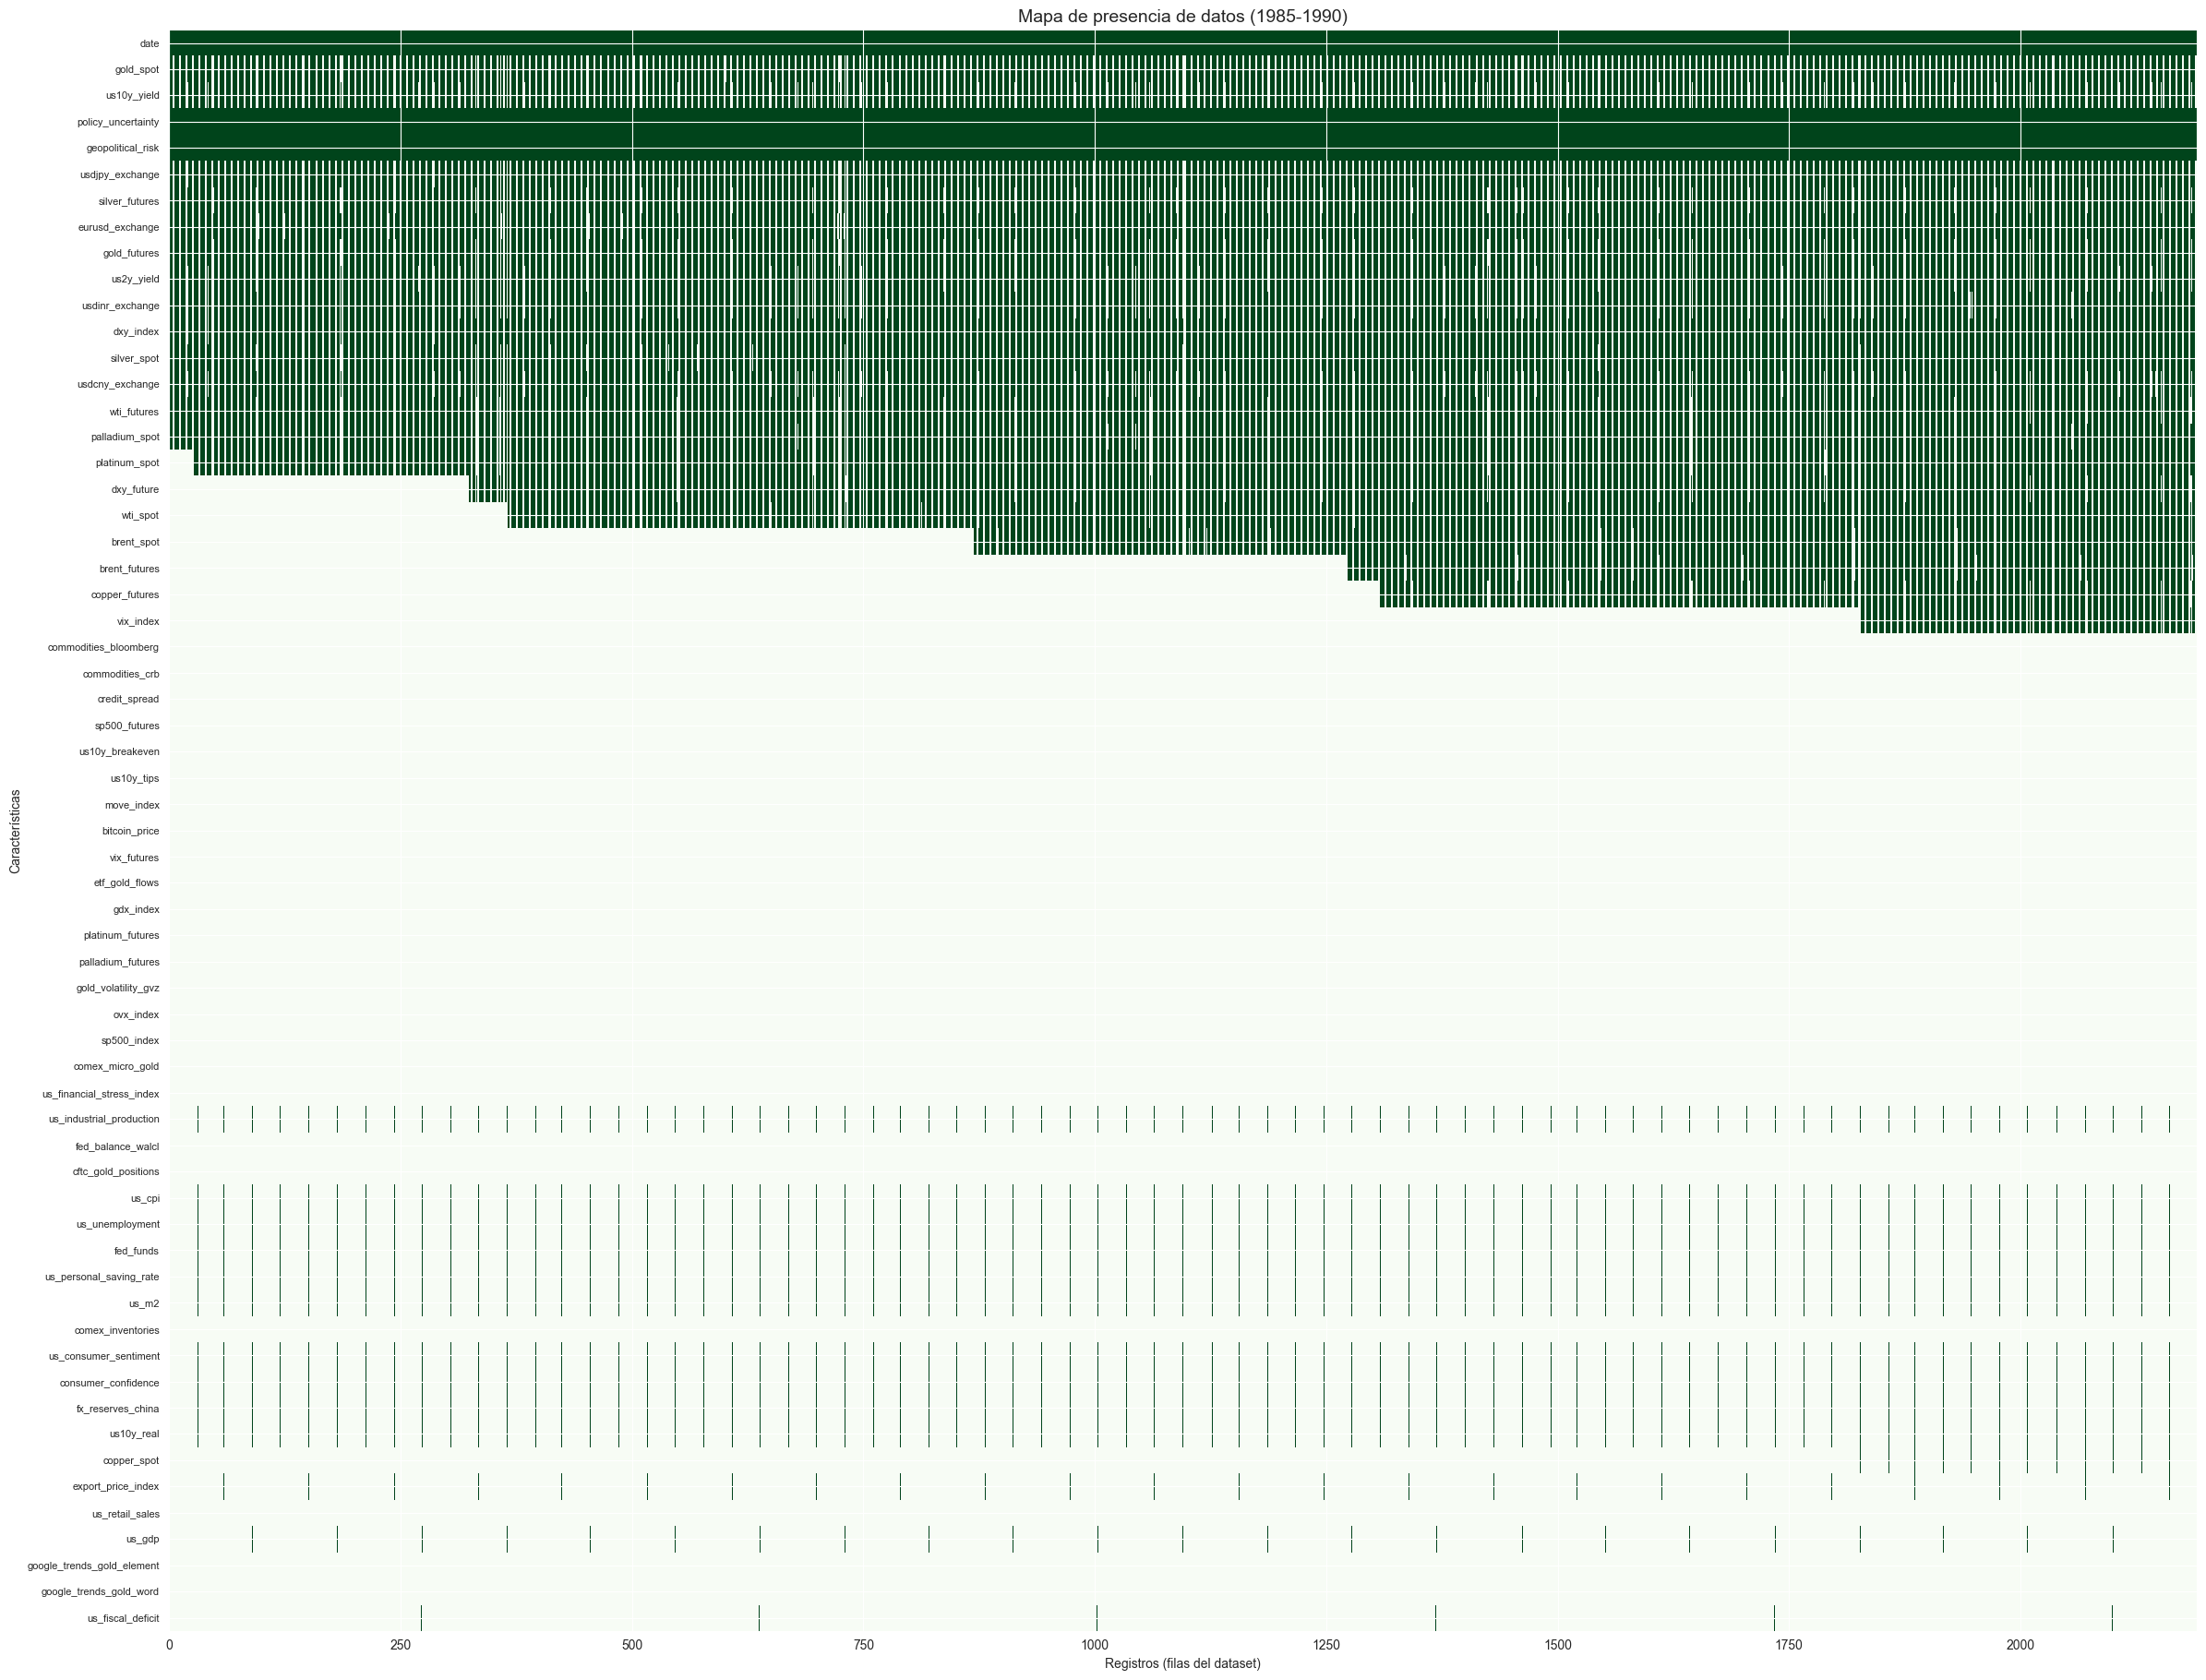

In [266]:
# -------------------------
# 2.3 Visualización zoom temporal (ej. 5 años)
# -------------------------
df_viz = df.copy()
zoom_start_year = START_YEAR
zoom_end_year   = START_YEAR + 5
df_viz = df_viz[(df_viz[DATE_COL].dt.year >= zoom_start_year) &
                (df_viz[DATE_COL].dt.year <= zoom_end_year)]
presence = df_viz.notnull().astype(int)
fig, ax = plt.subplots(figsize=(24, max(6, len(presence.columns) * 0.3)))
ax.imshow(
    presence.T,
    aspect='auto',
    interpolation='nearest',
    cmap=plt.cm.Greens
)
ax.set_title(f"Mapa de presencia de datos ({zoom_start_year}-{zoom_end_year})", fontsize=14)
ax.set_xlabel("Registros (filas del dataset)")
ax.set_ylabel("Características")
ax.set_yticks(np.arange(len(presence.columns)))
ax.set_yticklabels(presence.columns, fontsize=8)
plt.tight_layout()
plt.show()
